<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH-ML/blob/main/LinClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


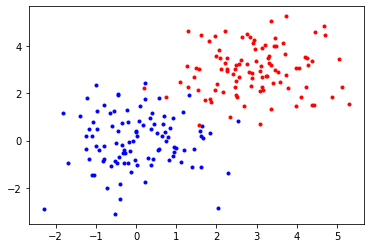

In [63]:
import requests
import matplotlib.pyplot as plt
import numpy as np
r = requests.get("https://raw.githubusercontent.com/ollihansen90/zeugs/main/ML_utils.py")
with open("utils.py", "w") as file:
    file.write(r.text)

from utils import LinClass, get_data, plot_stuff

data, label = get_data(100, 2, mus=np.array([[0,0],[3,3]]), vars=[1,1])
print(label)
plot_stuff(data, label)

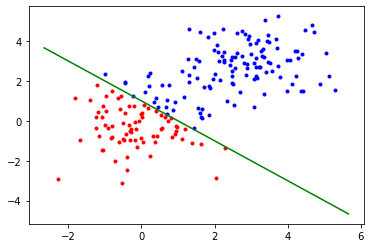

25


In [64]:
weights = -np.array([1,1,1])
f = LinClass(weights)
pred = f.get_predictions(data)
plot_stuff(data, pred, plotline=f)

print(np.sum(pred==label))

[-1 -1 -1]
0.7293055749644537 26


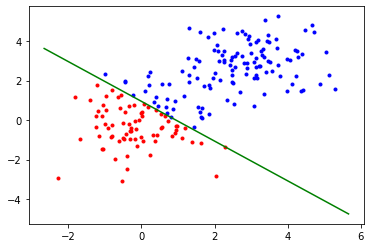

0.7212221791441921 27
0.7126011966706278 31
0.7033207801204066 33
0.6931951782522161 34
0.6819243938055425 37
0.6689850129181909 38
0.6533636852396508 39
0.6327973970595361 40
0.6010997497928535 38
0.5357092960142582 14


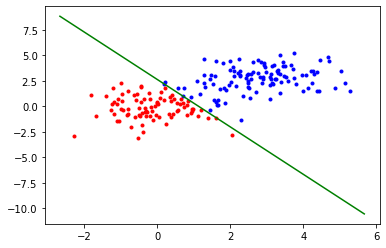

0.3383403662758619 134
0.16425308338956912 141
0.15126928566129558 151
0.1396768606253127 155
0.12940309513918688 162
0.1203415045943337 167
0.11236778785293172 176
0.10535333568220331 177
0.0991746593310901 179
0.09371879385034454 182


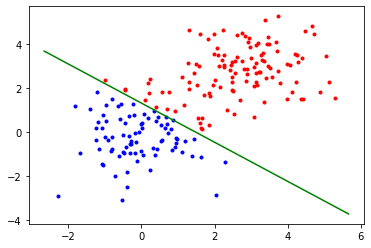

0.08888561518636653 182
0.0845881662875645 183
0.08075187775050979 187
0.0773132790249464 187
0.07421855567801912 190
0.07142214388161108 190
0.06888545247707366 191
0.06657574560264434 191
0.06446518844943411 191
0.0625300440442606 193


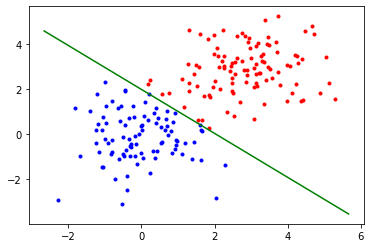

0.060750003070095066 193
0.05910762749456675 193
0.05758788981835709 193
0.056177791769154446 193
0.054866048557906506 194
0.05364282703569678 194
0.05249952808760147 193
0.051428605323021494 193
0.050423413570815485 193
0.04947808188646407 193


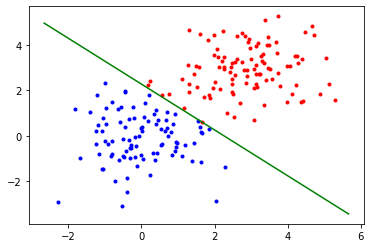

0.04858740676059309 194
0.04774676201762442 194
0.046952022541686046 194
0.04619949949177955 194
0.045485885092873594 194
0.04480820543334783 194
0.044163779977790786 194
0.04355018673029629 195
0.042965232167355066 196
0.04240692520942691 196


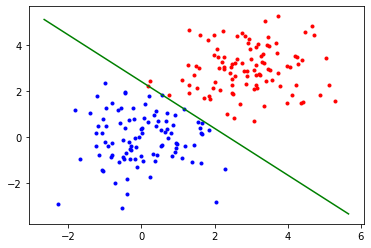

0.04187345462288665 196
0.041363169344534434 195
0.0408745613034674 195
0.040406250383203696 195
0.03995697122324552 195
0.039525561605944344 195
0.03911095221334564 195
0.03871215757106019 195
0.03832826802328122 195
0.037958442605773315 195


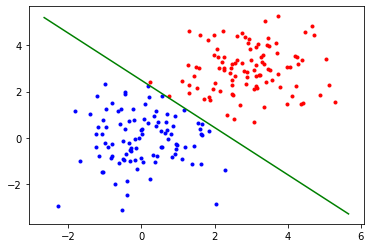

0.03760190270275581 195
0.037257926389710254 195
0.036925843377760545 195
0.03660503048682275 195
0.03629490758453764 195
0.035994933936364354 195
0.035704604919360214 195
0.03542344905829197 195
0.03515102534797716 195
0.03488692083027386 195


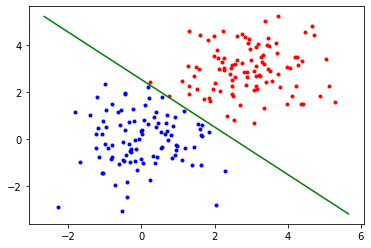

0.03463074839803471 195
0.034382144801709584 195
0.03414076883719699 195
0.033906299696077336 195
0.03367843546156081 195
0.03345689173540195 195
0.033241400382706815 195
0.0330317083830236 195
0.03282757677739107 194
0.032628779702145436 194


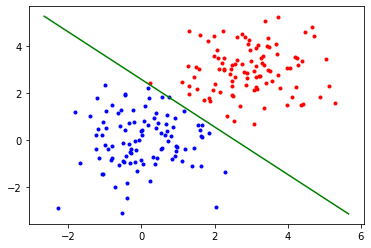

0.03243510350127792 194
0.03224634591000732 194
0.032062315303002596 194
0.03188283000137099 194
0.031707717633129996 194
0.03153681454241545 194
0.031369965243152866 194
0.031207021913340783 194
0.031047843926470663 194
0.030892297416943187 194


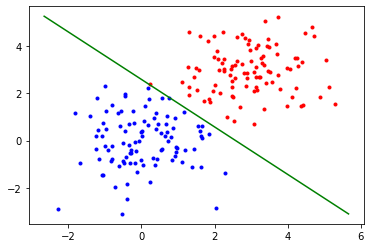

0.030740254876639835 194
0.030591594780076493 194
0.030446201235805416 194
0.030303963661946806 194
0.030164776483924297 194
0.030028538852651856 194
0.0298951543815761 194
0.02976453090111825 194
0.029636580229187044 194


In [66]:
weights = -np.array([1,1,1])
f = LinClass(weights)

n_epochs = 100
lr = 1
s = lambda x: 1/(1+np.exp(-x))
ds = lambda x: s(x)*(1-s(x))
print(f.params)
for epoch in range(n_epochs):
    prediction = s(f(data))
    loss = np.mean((prediction-label)**2)
    d_loss_w1 = 2*np.mean((prediction-label)*ds(f(data))*data[:,0])
    d_loss_w2 = 2*np.mean((prediction-label)*ds(f(data))*data[:,1])
    d_loss_w3 = 2*np.mean((prediction-label)*ds(f(data))*-1)
    f.params = f.params-lr*np.array([d_loss_w1, d_loss_w2, d_loss_w3])
    print(loss, np.sum(f.get_predictions(data)==label))
    if epoch%10==0:
        plot_stuff(data, f.get_predictions(data), plotline=f)